### Лабораторная работа №1
#### Вариант 7
#### Выполнил студент 14 группы 2 курса
#### Гордей Павел Дмитриевич
#### Задание 7. Обращение матрицы методом Гаусса с выбором ГЭ по столбцу.

1. Написать программу, которая обращает
матрицу методом Гаусса с выбором ГЭ по
столбцу. Применить программу к следующим
ниже входным данным и вывести результат.

$
A = \left(
\begin{array}{}
-1&-4&-5&-1&0&-1&-1\\
-1&-4&0&4&-4&0&-4\\
-2&-8&-5&-1&0&-4&0\\
-4&-16&-10&2&-4&-2&0\\
-8&-32&-20&4&-8&0&-2\\
-16&-64&-40&8&-16&-7&-4\\
5&-5&-5&-2&0&-2&-1\\
\end{array}
\right)
$

$
A = \left(
\begin{array}{}
1&1&1&1&1&1&1&1&1&1\\
1&2&4&8&16&32&64&128&256&512\\
1&3&9&27&81&243&729&2187&6561&19683\\
1&4&16&64&256&1024&4096&16384&65536&262144\\
1&5&25&125&625&3125&15625&78125&390625&1953125\\
1&6&36&216&1296&7776&46656&279936&1679616&10077696\\
1&7&49&343&2401&16807&117649&823543&5764801&40353607\\
1&8&64&512&4096&32768&262144&2097152&16777216&134217728\\
1&9&81&729&6561&59049&531441&4782969&43046721&387420489\\
1&10&100&1000&10000&100000&1000000&10000000&100000000&1000000000\\
\end{array}
\right)
$

$
A = \left(
\begin{array}{}
5&3&3&-4&5&-5&-4&-5&0&2\\
5&3&-1&2&3&0&-4&1&-4&-5\\
10&6&2&-3&-2&-2&-1&0&-3&-5\\
20&12&4&-5&-1&-4&4&-2&-2&-4\\
40&24&8&-10&5&-1&5&2&0&-3\\
80&48&16&-20&10&-12&-3&-3&3&2\\
160&96&32&-40&20&-24&-3&-4&1&4\\
320&192&64&-80&40&-48&-6&-11&0&-3\\
640&384&128&-160&80&-96&-12&-22&-5&2\\
-3&-3&0&0&5&3&-2&2&5&-2\\
\end{array}
\right)
$

Основной класс задачи:

In [2]:
import copy
import math


class CustomMatrix:
    def __init__(self, matrix: list):
        self.__matrix = matrix

    def get_matrix(self) -> list:
        return self.__matrix

    def get_matrix_dimension(self) -> int:
        return len(self.__matrix)

    def set_matrix(self, matrix: list):
        self.__matrix = matrix

    def inverse(self):
        if not self.__check_if_square_matrix():
            raise Exception("Matrix is not square.")

        size = len(self.__matrix)
        identity_matrix = [size * [0] for _ in range(size)]
        for i in range(size):
            identity_matrix[i][i] = 1

        for i in range(size - 1):
            self.__choose_max(identity_matrix, i)
            for j in range(i + 1, size):
                self.__update_line(identity_matrix, i, j)

        for l in range(size):
            for i in range(size - 1, -1, -1):
                summa = 0
                for j in range(i + 1, size):
                    summa += self.__matrix[i][j] * identity_matrix[j][l]
                identity_matrix[i][l] -= summa
                identity_matrix[i][l] /= self.__matrix[i][i]

        self.__matrix = identity_matrix
        return self

    def solve_gauss(self, vector: list) -> list:
        if not self.__check_if_square_matrix():
            raise Exception("Matrix is not square.")
        if len(self.__matrix) != len(vector):
            raise Exception("Invalid length of vector.")

        result = copy.deepcopy(vector)
        matrix = copy.deepcopy(self.__matrix)
        size = len(self.__matrix)

        for i in range(size - 1):
            self.__choose_max(result, i)
            for j in range(i + 1, size):
                self.__update_line(vector=result, base_line_index=i, row=j)

        for i in range(size - 1, -1, -1):
            summa = 0
            for j in range(i + 1, size):
                summa += self.__matrix[i][j] * result[j]
            result[i] -= summa
            result[i] /= self.__matrix[i][i]

        self.__matrix = matrix
        return result

    def __check_if_square_matrix(self) -> bool:
        for line in self.__matrix:
            if len(line) != len(self.__matrix):
                return False
        return True

    def __choose_max(self, matrix_or_vector: list, row: int):
        res_row = row
        max_element = math.fabs(self.__matrix[row][row])
        for i in range(row + 1, len(self.__matrix)):
            if math.fabs(self.__matrix[i][row]) > max_element:
                max_element = math.fabs(self.__matrix[i][row])
                res_row = i
        self.__matrix[row], self.__matrix[res_row] = self.__matrix[res_row], self.__matrix[row]
        matrix_or_vector[row], matrix_or_vector[res_row] = matrix_or_vector[res_row], matrix_or_vector[row]

    def __update_line(self, identity_matrix: list = None, base_line_index: int = 0, row: int = 0,
                      vector: list = None):
        if self.__matrix[base_line_index][base_line_index] == 0:
            raise ZeroDivisionError("Matrix is not invertible: determinant is equal to zero.")
        l = -self.__matrix[row][base_line_index] / self.__matrix[base_line_index][base_line_index]
        for col in range(base_line_index, len(self.__matrix)):
            self.__matrix[row][col] += l * self.__matrix[base_line_index][col]
            if identity_matrix is not None:
                identity_matrix[row][col] += l * identity_matrix[base_line_index][col]
        if vector is not None:
            vector[row] += l * vector[base_line_index]

    def __str__(self):
        lines = ''
        for line in self.__matrix:
            lines += str([round(x, 2) for x in line]) + "\n"
        return lines

Исходные матрицы:

In [3]:
first_matrix = [
    [-1, -4, -5, -1, 0, -1, -1],
    [-1, -4, 0, 4, -4, 0, -4],
    [-2, -8, -5, -1, 0, -4, 0],
    [-4, -16, -10, 2, -4, -2, 0],
    [-8, -32, -20, 4, -8, 0, -2],
    [-16, -64, -40, 8, -16, -7, -4],
    [5, -5, -5, -2, 0, -2, -1]
]

second_matrix = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    [1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683],
    [1, 4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144],
    [1, 5, 25, 125, 625, 3125, 15625, 78125, 390625, 1953125],
    [1, 6, 36, 216, 1296, 7776, 46656, 279936, 1679616, 10077696],
    [1, 7, 49, 343, 2401, 16807, 117649, 823543, 5764801, 40353607],
    [1, 8, 64, 512, 4096, 32768, 262144, 2097152, 16777216, 134217728],
    [1, 9, 81, 729, 6561, 59049, 531441, 4782969, 43046721, 387420489],
    [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
]

third_matrix = [
    [5, 3, 3, -4, 5, -5, -4, -5, 0, 2],
    [5, 3, -1, 2, 3, 0, -4, 1, -4, -5],
    [10, 6, 2, -3, -2, -2, -1, 0, -3, -5],
    [20, 12, 4, -5, -1, -4, 4, -2, -2, -4],
    [40, 24, 8, -10, 5, -1, 5, 2, 0, -3],
    [80, 48, 16, -20, 10, -12, -3, -3, 3, 2],
    [160, 96, 32, -40, 20, -24, -3, -4, 1, 4],
    [320, 192, 64, -80, 40, -48, -6, -11, 0, -3],
    [640, 384, 128, -160, 80, -96, -12, -22, -5, 2],
    [-3, -3, 0, 0, 5, 3, -2, 2, 5, -2]
]

Демонстрация:

In [7]:
matrix1 = CustomMatrix(copy.deepcopy(first_matrix))
print("\tFirst matrix:\n")
try:
    print(matrix1.inverse())
    print()
except ZeroDivisionError as e:
    print(e)

print("\n\tSecond matrix:\n")
matrix2 = CustomMatrix(copy.deepcopy(second_matrix))
print(matrix2.inverse())

print("\n\tThird matrix:\n")
matrix3 = CustomMatrix(copy.deepcopy(third_matrix))
print(matrix3.inverse())
print()

	First matrix:

Matrix is not invertible: determinant is equal to zero.

	Second matrix:

[-53.94, -2.78, 8.57, -90.0, -2.67, 15.0, 120.0, -62.14, 10.0, -1.0]
[162.88, 3.96, -17.45, 228.25, 19.27, -35.54, -334.33, 173.94, -28.18, 2.83]
[-197.21, -1.34, 12.08, -223.42, -38.7, 31.31, 373.98, -195.81, 32.01, -3.23]
[130.23, 0.17, -3.72, 112.64, 35.26, -13.55, -224.67, 118.58, -19.62, 1.99]
[-52.22, -0.01, 0.57, -32.51, -17.43, 3.16, 80.9, -43.12, 7.24, -0.74]
[13.15, -0.0, -0.04, 5.58, 5.05, -0.4, -18.27, 9.85, -1.68, 0.17]
[-2.07, 0.0, 0.0, -0.56, -0.88, 0.03, 2.61, -1.42, 0.25, -0.03]
[0.2, -0.0, -0.0, 0.03, 0.09, -0.0, -0.23, 0.13, -0.02, 0.0]
[-0.01, -0.0, -0.0, -0.0, -0.01, -0.0, 0.01, -0.01, 0.0, -0.0]
[0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0]


	Third matrix:

[-0.25, -0.42, 0.12, 0.37, -0.35, -0.36, -0.39, 0.35, 0.4, 0.5]
[0.25, 0.06, -0.12, -0.85, 0.45, -0.18, 0.09, 1.01, -0.57, -0.83]
[0.5, 9.67, -2.75, 3.18, 0.79, 12.47, 5.33, -23.86, -0.74, 0.0]
[-0.0, 5.75, -2.

2. Найти точные обратные матрицы с использованием библиотеки
SymPy или аналогичного программного обеспечения и вычислить
нормы разности между точной и приближенной матрицами $A^{-1}$

In [9]:
import sympy
import numpy


try:
    print("\tExact first matrix:\n")
    exact = sympy.Matrix(copy.deepcopy(first_matrix))
    exact = exact.inv()
    for r in exact.tolist():
        print(r)
    print("\n\tThe norm of the difference between the exact and approximate matrices: {}"
          .format(numpy.linalg.norm(numpy.subtract(exact.tolist(),
                            matrix1.get_matrix()), ord=numpy.inf)))
except Exception as e:
    print(e)

print("\n\tExact second matrix:\n")
exact = sympy.Matrix(copy.deepcopy(second_matrix))
exact = exact.inv()
for r in exact.tolist():
    print(r)
print("\n\tThe norm of the difference between the exact and approximate matrices: {}"
      .format(numpy.linalg.norm(numpy.subtract(exact.tolist(),
                        matrix2.get_matrix()), ord=numpy.inf)))

print("\n\tExact third matrix:\n")
exact = sympy.Matrix(copy.deepcopy(third_matrix))
exact = exact.inv()
for r in exact.tolist():
    print(r)
print("\n\tThe norm of the difference between the exact and approximate matrices: {}\n"
      .format(numpy.linalg.norm(numpy.subtract(exact.tolist(),
                        matrix3.get_matrix()), ord=numpy.inf)))

	Exact first matrix:

Matrix det == 0; not invertible.

	Exact second matrix:

[10, -45, 120, -210, 252, -210, 120, -45, 10, -1]
[-4861/252, 6121/56, -6541/21, 6751/12, -6877/10, 6961/12, -1003/3, 3533/28, -789/28, 7129/2520]
[79913/5040, -115923/1120, 400579/1260, -71689/120, 5985/8, -461789/720, 22439/60, -39867/280, 161353/5040, -6515/2016]
[-663941/90720, 264767/5040, -433739/2520, 728587/2160, -62549/144, 273431/720, -242639/1080, 435893/5040, -197741/10080, 4523/2268]
[6041/2880, -92771/5760, 13349/240, -163313/1440, 43319/288, -129067/960, 58247/720, -45449/1440, 6947/960, -95/128]
[-6709/17280, 18047/5760, -5419/480, 34343/1440, -93773/2880, 28603/960, -8771/480, 10427/1440, -3229/1920, 3013/17280]
[67/1440, -1123/2880, 349/240, -2281/720, 40/9, -1999/480, 1877/720, -757/720, 119/480, -5/192]
[-211/60480, 607/20160, -97/840, 31/120, -107/288, 57/160, -41/180, 59/630, -151/6720, 29/12096]
[1/6720, -53/40320, 13/2520, -17/1440, 5/288, -49/2880, 1/90, -47/10080, 23/20160, -1/8064]

3. Проведите экспериментальное исследование скорости
обращения матрицы в зависимости от размерности системы, используя для
тестов матрицу A со случайными числами. Постройте график зависимости
времени работы от размерности. Матрицу какой размерности ваша программа
на вашем компьютере может обратить за одну минуту?

Подсчет времени обращения:

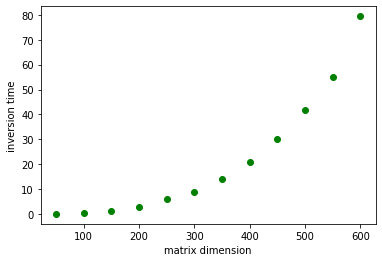

In [12]:
import time
import random
import matplotlib.pyplot as plt


def generate_matrix(n: int) -> list:
    generated_matrix = []
    for _ in range(n):
        generated_matrix.append([random.randint(-100, 100) for _ in range(n)])
    return generated_matrix


def compute_plot_for_inversion() -> list:
    x = [50 * i for i in range(1, 13)]
    y = []
    for index in range(len(x)):
        try:
            matrix = CustomMatrix(generate_matrix(x[index]))
            start = time.time()
            matrix.inverse()
            end = time.time()
            y.append(end - start)
        except ZeroDivisionError as err:
            print(err)
    return y


y_axis_for_inversion = [0.031249284744262695, 0.3281128406524658, 1.140587329864502, 2.782305955886841,
                        5.936437368392944, 9.033401489257812, 14.11325478553772, 21.0109806060791,
                        30.022388458251953, 41.59222650527954, 55.141825675964355, 79.4527599811554]


def plot_for_inversion():
    x = [50 * i for i in range(1, 13)]
    plt.scatter(x, y_axis_for_inversion, color="green")
    plt.xlabel("matrix dimension")
    plt.ylabel("inversion time")
    plt.show()


plot_for_inversion()

Из графика видно, что программа на моем компьютере способна обратить
за одну минуту матрицу размерностью 580.

4. Проведите экспериментальное исследование скорости
решения СЛАУ в зависимости от размерности системы, используя для
тестов матрицу A и вектор b со случайными числами. Постройте график зависимости
времени работы от размерности. Систему какой размерности ваша программа
на вашем компьютере может обратить за одну минуту?

Подсчет скорости решения СЛАУ

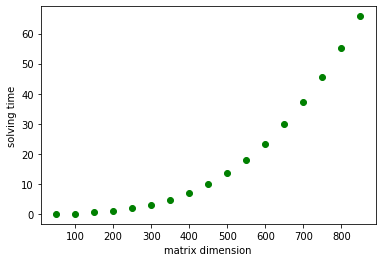

In [13]:
def generate_vector(n: int) -> list:
    generated_vector = []
    for _ in range(n):
        generated_vector.append(random.randint(-100, 100))
    return generated_vector


def compute_plot_for_slae() -> list:
    x = [50 * i for i in range(1, 18)]
    y = []
    for dimension in x:
        try:
            matrix = CustomMatrix(generate_matrix(dimension))
            vector = generate_vector(dimension)
            start = time.time()
            matrix.solve_gauss(vector)
            end = time.time()
            y.append(end - start)
        except ZeroDivisionError as err:
            print(err)
    return y


y_axis_for_slae = [0.03124713897705078, 0.15624690055847168, 0.5445623397827148, 0.9897611141204834,
                   1.8593089580535889, 3.1092660427093506, 4.7498414516448975, 7.062257289886475,
                   9.999656677246094, 13.640878200531006, 18.046886444091797, 23.422215700149536,
                   29.8277268409729, 37.094478607177734, 45.452930212020874, 55.136630058288574,
                   65.74627757072449]


def plot_for_slae():
    x = [50 * i for i in range(1, 18)]
    plt.scatter(x, y_axis_for_slae, color="green")
    plt.xlabel("matrix dimension")
    plt.ylabel("solving time")
    plt.show()


plot_for_slae()

Здесь уже компьютор может решить СЛАУ размерностью 810 за одну минуту

### Заключение

#### Краткое описание

Таким образом был реализован класс CustomMatrix, содержащий
функциональность для обращения матрицы и решения СЛАУ
методом Гаусса. В модуле resources.py находятся исходные
матрицы, а также вектора, содержащие время обращения матриц
и время решения СЛАУ для пунктов 3 и 4 соответственно.

#### Выводы

Первый пункт наглядно демонстрирует, что алгоритм Гаусса для
обращения плохо обусловленной матрицы абсолютно не годится (это
особенно видно для второй матрицы). Поэтому стоит использовать
другие методы решения этой задачи, например QR разложение, при
котором сохраняется евклидова норма векторов, что повышает точность вычислений.
А еще лучше вместо десятичных дробей работать с рациональными числами,
т.е. представлять числа не в десятичном виде, а в виде неправильной
дроби (как в SymPy). В таком случае погрешности машинного округления
никак не влияют на результат работы, т.к. мы работаем с
целыми числами.